In [1]:
%matplotlib inline

import pickle, os, glob
import numpy as np
from EEG.utils import load, plot_confusion_matrix,plot_mult_conf_matrices
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = "C:\\eeg\\01exp\\"

data = load(root,'result.dat')
print "Num tests: " + str(len(data))

Num tests: 252


In [3]:
#columns=['person','tshift','freq','decoder','classifier','max','mean','min','std','tfit','tscore','con_matr']

data = pd.DataFrame(data)
data.columns = ['person','tshift','freq','decoder','classifier','max','mean','min','std','tfit','tscore','con_matr','spd']
table = data.drop(['con_matr','spd'], axis=1)
table.sort_values(['max', 'mean','min','std'], ascending=[False, False, True,True])

,person,tshift,freq,decoder,classifier,max,mean,min,std,tfit,tscore
18,20161129_DBS_001,exp_data_aligned_start_0.cls,6-16,CSP,SVC,1.000000,0.858333,0.733333,0.072169,2.320,0.000917
60,20161129_DBS_001,exp_data_aligned_start_150.cls,6-16,CSP,SVC,1.000000,0.844444,0.733333,0.067128,1.615,0.000500
56,20161129_DBS_001,exp_data_aligned_start_150.cls,6-16,CSP,LinearDiscriminantAnalysis,1.000000,0.836111,0.733333,0.064490,1.896,0.000750
14,20161129_DBS_001,exp_data_aligned_start_0.cls,6-16,CSP,LinearDiscriminantAnalysis,1.000000,0.836111,0.733333,0.072595,2.521,0.000750
28,20161129_DBS_001,exp_data_aligned_start_0.cls,10-16,CSP,LinearDiscriminantAnalysis,1.000000,0.825000,0.700000,0.070874,1.770,0.000667
70,20161129_DBS_001,exp_data_aligned_start_150.cls,10-16,CSP,LinearDiscriminantAnalysis,1.000000,0.822222,0.666667,0.074949,2.250,0.000750
158,20161209_KPS_001,exp_data_aligned_start_150.cls,10-16,CSP,SVC,0.966667,0.836111,0.700000,0.068662,2.185,0.000750
32,20161129_DBS_001,exp_data_aligned_start_0.cls,10-16,CSP,SVC,0.966667,0.833333,0.700000,0.063828,1.862,0.000917
140,20161209_KPS_001,exp_data_aligned_start_150.cls,6-16,CSP,LinearDiscriminantAnalysis,0.966667,0.825000,0.700000,0.075920,1.622,0.000750
83,20161129_DBS_001,exp_data_aligned_start_150.cls,10-16,str,LogisticRegression,0.966667,0.825000,0.566667,0.122569,0.354,0.016333


Normalized confusion matrix


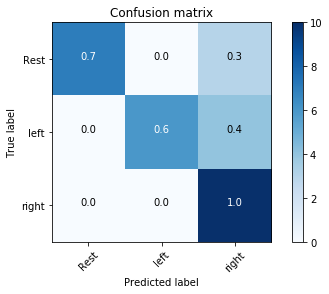

In [4]:
plot_mult_conf_matrices(data['con_matr'][0],[u'Rest',u'left',u'right'])

In [5]:
table.to_csv('C:\\eeg\\01exp\\result.csv')

In [6]:
from pandas import ExcelWriter

writer = ExcelWriter('C:\\eeg\\01exp\\PythonExport.xlsx')
table.to_excel(writer,'Sheet1')
writer.save()